<a href="https://colab.research.google.com/github/snoozername/downloader_copy/blob/main/rhyme_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/"


In [ ]:
if os.path.exists("complete-poetryfoundationorg-dataset.zip"):
  print("complete-poetryfoundationorg-dataset exists")
else:
  !kaggle datasets download -d johnhallman/complete-poetryfoundationorg-dataset
  !unzip complete-poetryfoundationorg-dataset.zip

if os.path.exists("rap_lyrics.zip"):
  print("rap lyrics exists exists")
else:
  !kaggle datasets download -d jamiewelsh2/complete-poetryfoundationorg-dataset
  !unzip complete-poetryfoundationorg-dataset.zip -y

Dataset URL: https://www.kaggle.com/datasets/johnhallman/complete-poetryfoundationorg-dataset
License(s): other
  0% 0.00/9.85M [00:00<?, ?B/s]
100% 9.85M/9.85M [00:00<00:00, 107MB/s]
Archive:  complete-poetryfoundationorg-dataset.zip
replace kaggle_poem_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kaggle_poem_dataset.csv  
403 - Forbidden - Permission 'datasets.get' was denied
Archive:  complete-poetryfoundationorg-dataset.zip
caution: filename not matched:  -y


In [ ]:
!pip install textstat pronouncing

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.2 MB/s eta 0:00:00
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6233 sha256=2adf836b6ef34a5a6245ccbccdcdda3f71ff6459b8882b6255791628fa09a1b4
  Stored in directory: /root/.cache/pip/wheels/05/f6/1d/599c67da1fa48c086d8c49e8fc6bd5f05bc9fa66fb04bed5db
Successfully built pronouncing


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
import spacy
spacy.cli.download("en_core_web_sm")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd

#heres how we load the datsets
#poems
poem_df = pd.read_csv("kaggle_poem_dataset.csv")
#raps
rap_df = pd.read_csv("updated_rappers.csv")
rap_df.head()

,Unnamed: 0,artist,song,lyric,next lyric
0,0,Fetty Wap,Trap Queen,rgf productions,remy boyz yahah
1,0,Fetty Wap,Trap Queen,remy boyz yahah,1738 ayy
2,0,Fetty Wap,Trap Queen,1738 ayy,im like hey whats up hello
3,0,Fetty Wap,Trap Queen,im like hey whats up hello,seen yo pretty ass soon as you came in the door
4,0,Fetty Wap,Trap Queen,seen yo pretty ass soon as you came in the door,i just wanna chill got a sack for us to roll


In [ ]:
#group by song and concatenate lyrics
# rap_df = rap_df.groupby('song')['lyric'].apply(lambda x: ''.join(x)).reset_index()

rap_df = rap_df.groupby('song')['lyric'].apply(lambda x: '\n'.join(x)).reset_index()



#give us some rows!
rap_df.head()

,song,lyric
0,#1,uh uh uh\ni just gotta bring it to they attent...
1,#45Lies Freestyle,the devils got to be the potus\nto misdirect u...
2,#8,what up jean you know theres a lot of nonsense...
3,#Alone,if you you wanna come against i i\nthat lambo ...
4,#Ham4Ham: The Hamilton Mixtape Performance,no john trumbull black thought\nyeah listen\...


In [ ]:
song_name = "Trap Queen"


song_data = rap_df.loc[rap_df['song'] == song_name]

#display result
# song_data['lyric'].values

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def get_wordnet_pos(word):
  tag = pos_tag([word])[0][1][0].upper() #uppercase pos = part of speech
  tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
  # print(word)
  return tag_dict.get(tag, wordnet.NOUN)



def preprocess(text, use_lemmatizer=True, use_stemmer=False, remove_stop_words=False):

  #text var represents the words w/o punctuation
  #doesnt erase contractions
  text = text.translate(str.maketrans("","", string.punctuation))

  text = text.lower()


  #remove stop words
  if remove_stop_words:
    tokens = [word for word in text.split() if word not in stop_words]
  #or keep stop words
  else:
    tokens = [word for word in text.split() if word != " "]


  if use_lemmatizer:
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

  if use_stemmer:
    tokens = [stemmer.stem(word) for word in tokens]

  return " ".join(tokens)

#raps processing
# rap_df['processed_lyrics'] = rap_df['lyric'].apply(lambda x: preprocess(x, use_lemmatizer=True, use_stemmer=False, remove_stop_words=False))
# poem_df #this line is like a print(poem_df.head())
# rap_df

#poems processing
# poem_df['processed_poems'] = poem_df['Content'].apply(lambda x : preprocess(x, use_lemmatizer=True, use_stemmer=False, remove_stop_words=False))
#saving to csv
# rap_df.to_csv("preprocessed_rappers.csv", index=False)
# poem_df.to_csv("preprocessed_poems.csv", index=False)

In [ ]:
import pronouncing
import re




def extract_end_words_from_original(text):
    # Split into lines using the original formatting
    lines = text.split("\n")
    # Extract the last word from each line, preserving original punctuation and capitalization
    end_words = [line.strip().split()[-1] if line.strip() else '' for line in lines]
    return end_words

def rhyme_density_using_original(text):
    end_words = extract_end_words_from_original(text)
    rhyming_pairs = 0
    total_pairs = 0

    # print(end_words)

    # Check rhyming words for consecutive lines
    #TODO: how about skipping lines?
    for i in range(len(end_words) - 1):
        if end_words[i] and end_words[i + 1]:  # Ensure non-empty words
            rhymes = pronouncing.rhymes(end_words[i])
            total_pairs += 1
            if end_words[i + 1] in rhymes:
                rhyming_pairs += 1

    return rhyming_pairs / total_pairs if total_pairs > 0 else 0


# Apply this to the original lyrics
rap_df['rhyme_density'] = rap_df['lyric'].apply(rhyme_density_using_original)

# print(rap_df['rhyme_density'])

average_rhyme_density_rap = rap_df['rhyme_density'].mean()

print("mean:", average_rhyme_density_rap)






mean: 0.07863747161620646


word freq. analysis

In [ ]:
from collections import Counter


rap_df_processed = pd.read_csv("preprocessed_rappers.csv")
poem_df_processed = pd.read_csv("preprocessed_poems.csv")



In [ ]:
#combine all words into a single list
# rap_words = ' '.join(rap_df_processed['processed_lyrics']).split()
poem_words = ' '.join(poem_df_processed['processed_poems']).split()

In [ ]:
#the lists
# rap_words
poem_words

In [ ]:
#get word freqs
# rap_word_freq = Counter(rap_words)
poem_word_freq = Counter(poem_words)

print("most common words in poems:", poem_word_freq.most_common(10))

most common words in poems: [('the', 244621), ('and', 125250), ('a', 118235), ('of', 103255), ('be', 102729), ('to', 84165), ('in', 72522), ('i', 62459), ('it', 41621), ('that', 36047)]


graphing most common words, including stop words for now<br>
future graphs will skip stop words for more interesting data<br>
rhyming analysis could still use the stop words

Text(0, 0.5, 'Frequency')

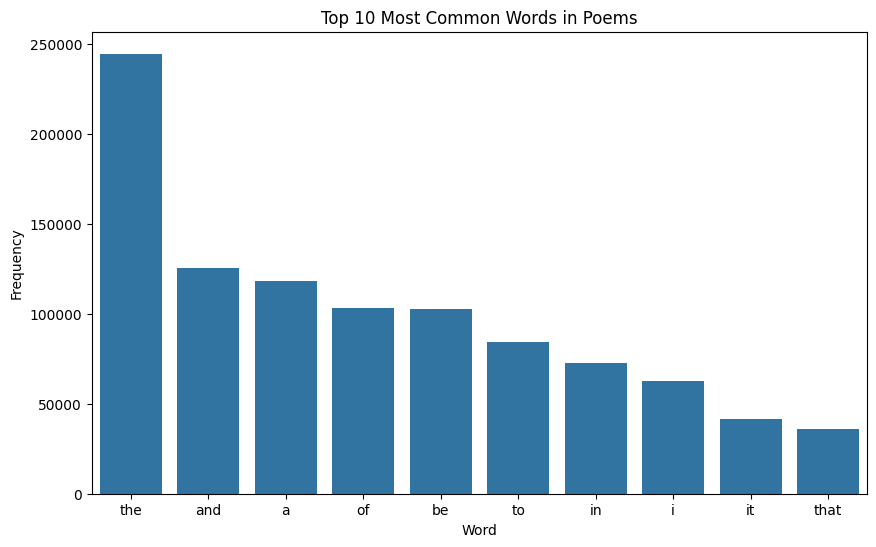

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#top 10 common words - including the stop words for now
poem_common_words = pd.DataFrame(poem_word_freq.most_common(10), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=poem_common_words)
plt.title('Top 10 Most Common Words in Poems')
plt.xlabel('Word')
plt.ylabel('Frequency')